## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#Using a Neural Network classification for predicting market moves based on headlines

In [2]:
#link for data source -https://www.kaggle.com/aaron7sun/stocknews/downloads/stocknews.zip/1

In [3]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import glob
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import statistics
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.metrics import accuracy_score 
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import np_utils
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from textblob import TextBlob 
%matplotlib inline
plt.style.use('ggplot')





Using TensorFlow backend.


In [4]:
#Importing and viewing dataset
# Index(Label) is direction of overall stock market for the day 1 is up 0 is down
data = pd.read_csv('./stocknews/Combined_News_DJIA.csv')
data.head(2)



,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


In [5]:
data.tail(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


In [6]:
#Evaluating number of positive and negative days and sniffing for null values
data['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [7]:
#describing the data
data.shape

(1989, 27)

In [8]:
#Data cleaning
#data.isnull().sum()
# making new data frame with dropped NA values 
new_data = data.dropna(axis = 0, how ='any') 
  
# comparing sizes of data frames 
print("Old data frame length:", len(data), "\nNew data frame length:",  
       len(new_data), "\nNumber of rows with at least 1 NA value: ", 
       (len(data)-len(new_data))) 

Old data frame length: 1989 
New data frame length: 1986 
Number of rows with at least 1 NA value:  3


In [9]:
#Splitting data set into test and train sets
#train = data[data['Date'] < '2012-07-20']
#test = data[data['Date'] > '2012-07-20']

In [10]:
#Splitting data set into test and train sets
train = new_data[new_data['Date'] < '2015-01-01']
#test = new_data[new_data['Date'] > '2015-01-01']
test = new_data[new_data['Date'] > '2014-12-31']

In [11]:
#Vectorizing text using Term Frequency-Inverse Document Frequency
batch_size = 32
nb_classes = 2
advancedvectorizer = TfidfVectorizer( min_df=0.04, max_df=0.3, max_features = 200000, ngram_range = (2, 2))
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
print(advancedtest.shape)
print(advancedtrain.shape)
#print(advancedtrain)

(378, 400)
(1608, 400)


In [12]:
X_train = advancedtrain.toarray()
X_test = advancedtest.toarray()

#print('X_train shape:', X_train.shape)
#print('X_test shape:', X_test.shape)
y_train = np.array(train["Label"])
y_test = np.array(test["Label"])

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


# pre-processing: divide by max and substract mean
#scale = np.max(X_train)
#X_train /= scale
#X_test /= scale

#mean = np.mean(X_train)
#X_train -= mean
#X_test -= mean

#Defining input dimension
input_dim = X_train.shape[1]


model = Sequential()
model.add(Dense(256, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

print("Training...")
model.fit(X_train, Y_train, nb_epoch=2, batch_size=16, validation_split=0.15)

print("Generating test predictions...")
preds14 = model.predict_classes(X_test, verbose=0)
acc14 = accuracy_score(test["Label"], preds14)


W0924 14:10:17.222471 140736230503296 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0924 14:10:17.248749 140736230503296 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 14:10:17.252400 140736230503296 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0924 14:10:17.270783 140736230503296 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0924 14:10:17.281188 

Training...
Train on 1366 samples, validate on 242 samples
Epoch 1/2
1366/1366 [==============================] - 1s 397us/step - loss: 0.6952 - val_loss: 0.6853
Epoch 2/2
1366/1366 [==============================] - 0s 190us/step - loss: 0.6789 - val_loss: 0.6872
Generating test predictions...


In [13]:
acc14

0.5529100529100529

In [14]:
#Trying another model to improve accuracy, changing loss function and optimizer
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = pd.read_csv('./stocknews/Combined_News_DJIA.csv')
# split into input (X) and output (y) variables
# define the keras model
model1 = Sequential()
model1.add(Dense(64, input_dim=400, activation='relu'))
model.add(Dropout(0.5))
model1.add(Dense(48, activation='relu'))
model.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model1.fit(X_train, Y_train, epochs=20, batch_size=10, validation_split= 0.15)
#model.fit(X_train, Y_train, nb_epoch=2, batch_size=16, validation_split=0.15)
# evaluate the keras model
_, accuracy = model1.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

Train on 1366 samples, validate on 242 samples
Epoch 1/20
1366/1366 [==============================] - 1s 493us/step - loss: 0.6924 - acc: 0.5264 - val_loss: 0.6851 - val_acc: 0.5579
Epoch 2/20
1366/1366 [==============================] - 0s 209us/step - loss: 0.6774 - acc: 0.5747 - val_loss: 0.6824 - val_acc: 0.5331
Epoch 3/20
1366/1366 [==============================] - 0s 220us/step - loss: 0.5969 - acc: 0.6867 - val_loss: 0.7242 - val_acc: 0.5537
Epoch 4/20
1366/1366 [==============================] - 0s 218us/step - loss: 0.4036 - acc: 0.8397 - val_loss: 0.9247 - val_acc: 0.5331
Epoch 5/20
1366/1366 [==============================] - 0s 214us/step - loss: 0.1542 - acc: 0.9583 - val_loss: 1.3199 - val_acc: 0.5372
Epoch 6/20
1366/1366 [==============================] - 0s 222us/step - loss: 0.0375 - acc: 0.9956 - val_loss: 1.8427 - val_acc: 0.5124
Epoch 7/20
1366/1366 [==============================] - 0s 213us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 2.1067 - val_acc: 0.5248
E

In [15]:
#Evaluating the performance of model 1
model1.evaluate(X_test,Y_test)

378/378 [==============================] - 0s 76us/step


[3.0328142844810686, 0.5582010578856897]

In [16]:
# Predicting the Test set results
y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm


array([[ 76,  57],
       [110, 135]])

In [17]:
#CASES
#Try Alternates. Use L2 regularization and optimize lambda penalty function. Grid search
#Try Alternates. Use L1 or the combined L1L2 methods instead of L2 regularization.
#Regularize Output Layer. - Regularize the output layer of the model and compare the results. (Dropout)
# Regularize Bias. Regularize the bias weight and compare the results.

Train on 1366 samples, validate on 242 samples
Epoch 1/20
1366/1366 [==============================] - 1s 747us/step - loss: 1.1991 - acc: 0.5359 - val_loss: 0.9077 - val_acc: 0.5579
Epoch 2/20
1366/1366 [==============================] - 0s 236us/step - loss: 0.8038 - acc: 0.5366 - val_loss: 0.7334 - val_acc: 0.5579
Epoch 3/20
1366/1366 [==============================] - 0s 229us/step - loss: 0.7127 - acc: 0.5373 - val_loss: 0.6970 - val_acc: 0.5579
Epoch 4/20
1366/1366 [==============================] - 0s 237us/step - loss: 0.6960 - acc: 0.5381 - val_loss: 0.6902 - val_acc: 0.5579
Epoch 5/20
1366/1366 [==============================] - 0s 227us/step - loss: 0.6925 - acc: 0.5381 - val_loss: 0.6882 - val_acc: 0.5579
Epoch 6/20
1366/1366 [==============================] - 0s 236us/step - loss: 0.6904 - acc: 0.5381 - val_loss: 0.6876 - val_acc: 0.5579
Epoch 7/20
1366/1366 [==============================] - 0s 237us/step - loss: 0.6912 - acc: 0.5381 - val_loss: 0.6877 - val_acc: 0.5579
E

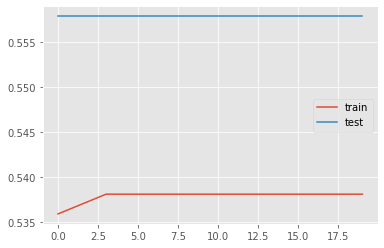

In [18]:
# Case 1 and 3 combined: L2 regularization techniques with droupouts
#Trying another model to improve accuracy
from keras import regularizers
from matplotlib import pyplot
# load the dataset
dataset = pd.read_csv('./stocknews/Combined_News_DJIA.csv')
# split into input (X) and output (y) variables
# define the keras model
model2 = Sequential()
model2.add(Dense(64, input_dim=400, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.01) ))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model2.fit(X_train, Y_train, epochs=20, batch_size=10, validation_split= 0.15)
#model.fit(X_train, Y_train, nb_epoch=2, batch_size=16, validation_split=0.15)
# evaluate the keras model
_, accuracy = model2.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

#plotting accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [19]:
#Evaluating the performance of the second model
model2.evaluate(X_test,Y_test)
y_pred2 = model2.predict(X_test)
y_pred2 = np.argmax(y_pred2, axis=1)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_pred2, y_test)
cm2

378/378 [==============================] - 0s 43us/step


array([[  0,   0],
       [186, 192]])

Train on 1366 samples, validate on 242 samples
Epoch 1/20
1366/1366 [==============================] - 1s 721us/step - loss: 5.0287 - acc: 0.5315 - val_loss: 2.1114 - val_acc: 0.5579
Epoch 2/20
1366/1366 [==============================] - 0s 231us/step - loss: 1.2862 - acc: 0.5381 - val_loss: 0.8435 - val_acc: 0.5579
Epoch 3/20
1366/1366 [==============================] - 0s 255us/step - loss: 0.7489 - acc: 0.5381 - val_loss: 0.6992 - val_acc: 0.5579
Epoch 4/20
1366/1366 [==============================] - 0s 227us/step - loss: 0.6948 - acc: 0.5381 - val_loss: 0.6883 - val_acc: 0.5579
Epoch 5/20
1366/1366 [==============================] - 0s 230us/step - loss: 0.6908 - acc: 0.5381 - val_loss: 0.6872 - val_acc: 0.5579
Epoch 6/20
1366/1366 [==============================] - 0s 247us/step - loss: 0.6905 - acc: 0.5381 - val_loss: 0.6870 - val_acc: 0.5579
Epoch 7/20
1366/1366 [==============================] - 0s 236us/step - loss: 0.6906 - acc: 0.5381 - val_loss: 0.6874 - val_acc: 0.5579
E

1366/1366 [==============================] - 0s 320us/step - loss: 0.1770 - acc: 0.9517 - val_loss: 1.8236 - val_acc: 0.5496
Epoch 19/20
1366/1366 [==============================] - 0s 315us/step - loss: 0.1743 - acc: 0.9561 - val_loss: 2.0751 - val_acc: 0.5744
Epoch 20/20
378/378 [==============================] - 0s 50us/step
Accuracy: 54.10
Train on 1366 samples, validate on 242 samples
Epoch 1/20
1366/1366 [==============================] - 2s 1ms/step - loss: 0.7025 - acc: 0.4985 - val_loss: 0.6954 - val_acc: 0.5579
Epoch 2/20
1366/1366 [==============================] - 1s 468us/step - loss: 0.6981 - acc: 0.5381 - val_loss: 0.6957 - val_acc: 0.5579
Epoch 3/20
1366/1366 [==============================] - 1s 471us/step - loss: 0.6995 - acc: 0.5322 - val_loss: 0.6948 - val_acc: 0.5579
Epoch 4/20
1366/1366 [==============================] - 0s 341us/step - loss: 0.6964 - acc: 0.5381 - val_loss: 0.6940 - val_acc: 0.5620
Epoch 5/20
1366/1366 [==============================] - 0s 239us/

1366/1366 [==============================] - 0s 258us/step - loss: 0.2419 - acc: 0.9122 - val_loss: 1.3493 - val_acc: 0.5826
Epoch 15/20
1366/1366 [==============================] - 0s 242us/step - loss: 0.1797 - acc: 0.9312 - val_loss: 1.7336 - val_acc: 0.5702
Epoch 16/20
1366/1366 [==============================] - 0s 266us/step - loss: 0.1920 - acc: 0.9297 - val_loss: 1.5858 - val_acc: 0.5620
Epoch 17/20
1366/1366 [==============================] - 0s 242us/step - loss: 0.1455 - acc: 0.9517 - val_loss: 1.8154 - val_acc: 0.5785
Epoch 18/20
1366/1366 [==============================] - 0s 240us/step - loss: 0.1423 - acc: 0.9531 - val_loss: 1.7882 - val_acc: 0.5744
Epoch 19/20
1366/1366 [==============================] - 0s 246us/step - loss: 0.1214 - acc: 0.9583 - val_loss: 1.8695 - val_acc: 0.5620
Epoch 20/20
378/378 [==============================] - 0s 51us/step
Accuracy: 54.10


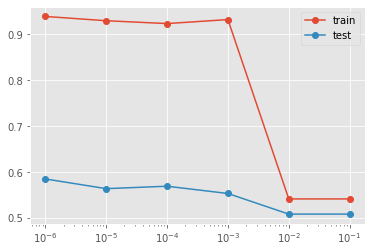

In [20]:
#Case 1 continued
#Checking to see if adjusting the l2 regularization parameter can help improve the calculation
#optimizing the regularization hyperparameter value using grid search to determine best l2 parameter

#L2 regularization techniques
#Trying another model to improve accuracy
from keras import regularizers
from matplotlib import pyplot
# load the dataset
dataset = pd.read_csv('./stocknews/Combined_News_DJIA.csv')
# split into input (X) and output (y) variables
# define the keras model
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
    model3 = Sequential()
    model3.add(Dense(64, input_dim=400, activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(48, activation='relu', kernel_regularizer=regularizers.l2(param) ))
    model3.add(Dropout(0.5))
    model3.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(param)))
    model3.add(Dropout(0.5))
    model3.add(Dense(2, activation='softmax'))
# compile the keras model
    model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
    history1=model3.fit(X_train, Y_train, epochs=20, batch_size=10, validation_split= 0.15)
#model.fit(X_train, Y_train, nb_epoch=2, batch_size=16, validation_split=0.15)
# evaluate the keras model
    _, train_acc = model3.evaluate(X_train, Y_train)
    _, test_acc = model3.evaluate(X_test, Y_test)
    print('Accuracy: %.2f' % (accuracy*100))
    all_train.append(train_acc)
    all_test.append(test_acc)
#plotting accuracy
#pyplot.plot(history.history['acc'], label='train')
#pyplot.plot(history.history['val_acc'], label='test')
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()

In [21]:
model3.evaluate(X_test,Y_test)

378/378 [==============================] - 0s 61us/step


[2.012203299810016, 0.5846560849714532]

In [28]:
y_pred3 = model3.predict(X_test)
y_pred3 = np.argmax(y_pred3, axis=1)
cm3 = confusion_matrix(y_pred3, y_test)
cm3

array([[ 69,  40],
       [117, 152]])

Train on 1366 samples, validate on 242 samples
Epoch 1/20
1366/1366 [==============================] - 2s 1ms/step - loss: 311.8764 - acc: 0.5381 - val_loss: 113.1344 - val_acc: 0.5579
Epoch 2/20
1366/1366 [==============================] - 0s 305us/step - loss: 33.4992 - acc: 0.5381 - val_loss: 1.5243 - val_acc: 0.5579
Epoch 3/20
1366/1366 [==============================] - 0s 258us/step - loss: 1.2984 - acc: 0.5381 - val_loss: 1.2610 - val_acc: 0.5579
Epoch 4/20
1366/1366 [==============================] - 0s 260us/step - loss: 1.2700 - acc: 0.5381 - val_loss: 1.2659 - val_acc: 0.5579
Epoch 5/20
1366/1366 [==============================] - 0s 258us/step - loss: 1.2707 - acc: 0.5381 - val_loss: 1.2561 - val_acc: 0.5579
Epoch 6/20
1366/1366 [==============================] - 0s 278us/step - loss: 1.2704 - acc: 0.5381 - val_loss: 1.2788 - val_acc: 0.5579
Epoch 7/20
1366/1366 [==============================] - 0s 265us/step - loss: 1.2702 - acc: 0.5381 - val_loss: 1.2646 - val_acc: 0.557

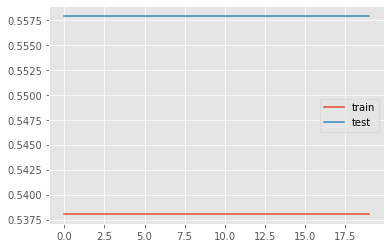

In [22]:
#Case 2 : Trying an L1 regularization

#from keras import regularizers
#from matplotlib import pyplot
# load the dataset
dataset = pd.read_csv('./stocknews/Combined_News_DJIA.csv')
# split into input (X) and output (y) variables
# define the keras model
model4 = Sequential()
model4.add(Dense(64, input_dim=400, activation='relu'))
model4.add(Dropout(0.05))
model4.add(Dense(48, activation='relu', kernel_regularizer=regularizers.l1(1) ))
model4.add(Dropout(0.05))
model4.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(1)))
model4.add(Dropout(0.05))
model4.add(Dense(2, activation='softmax'))
# compile the keras model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model4.fit(X_train, Y_train, epochs=20, batch_size=10, validation_split= 0.15)
#model.fit(X_train, Y_train, nb_epoch=2, batch_size=16, validation_split=0.15)
# evaluate the keras model
_, accuracy = model4.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))
print(history.history.keys())
#plotting accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [23]:
model4.evaluate(X_test,Y_test)

378/378 [==============================] - 0s 56us/step


[1.2606381474348602, 0.5079365098287189]

Train on 1366 samples, validate on 242 samples
Epoch 1/20
1366/1366 [==============================] - 2s 1ms/step - loss: 1.2586 - acc: 0.5227 - val_loss: 0.9431 - val_acc: 0.5579
Epoch 2/20
1366/1366 [==============================] - 0s 300us/step - loss: 0.8281 - acc: 0.5432 - val_loss: 0.7505 - val_acc: 0.5579
Epoch 3/20
1366/1366 [==============================] - 1s 394us/step - loss: 0.7242 - acc: 0.5373 - val_loss: 0.7052 - val_acc: 0.5579
Epoch 4/20
1366/1366 [==============================] - 1s 401us/step - loss: 0.6995 - acc: 0.5381 - val_loss: 0.6945 - val_acc: 0.5579
Epoch 5/20
1366/1366 [==============================] - 1s 380us/step - loss: 0.6948 - acc: 0.5381 - val_loss: 0.6922 - val_acc: 0.5579
Epoch 6/20
1366/1366 [==============================] - 0s 340us/step - loss: 0.6892 - acc: 0.5395 - val_loss: 0.6919 - val_acc: 0.5579
Epoch 7/20
1366/1366 [==============================] - 1s 507us/step - loss: 0.6896 - acc: 0.5388 - val_loss: 0.6921 - val_acc: 0.5579
Epo

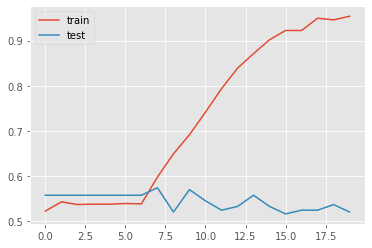

In [24]:
#model 3 seems best to compete with the default so trying the categorical_crossentropy
#l2 =0.01
model5 = Sequential()
model5.add(Dense(100, input_dim=400, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.01) ))
model5.add(Dropout(0.5))
model5.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model5.add(Dropout(0.5))
model5.add(Dense(2, activation='softmax'))
# compile the keras model
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model5.fit(X_train, Y_train, epochs=20, batch_size=10, validation_split= 0.15)
#model.fit(X_train, Y_train, nb_epoch=2, batch_size=16, validation_split=0.15)
# evaluate the keras model
_, accuracy = model5.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))
print(history.history.keys())
#plotting accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()



In [25]:
#Evalauting the performance of model5
model5.evaluate(X_test,Y_test)

378/378 [==============================] - 0s 69us/step


[1.741166631380717, 0.5687830706752798]

In [26]:
#Building a confusion matrix to see prediction results
y_pred5 = model5.predict(X_test)
y_pred5 = np.argmax(y_pred5, axis=1)
cm5 = confusion_matrix(y_pred5, y_test)
cm5

array([[ 69,  46],
       [117, 146]])

In [27]:
#Model 3 is the best.